In [40]:
%pip install -U seaborn
%pip install -U sklearn
%pip uninstall botocore -y
%pip install -q 'botocore==1.22.5'
%pip install --upgrade numpy
%pip install --upgrade pandas


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage

In [1]:
#import the libraries that we will use
import s3fs
import sagemaker
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regression algorithm
from sklearn.ensemble import GradientBoostingRegressor # Import XGBoost algorithm 
from sklearn.model_selection import train_test_split
import joblib


In [9]:
#Now that it is there, in the future you can 
df = pd.read_csv('finalwithtopics.csv')



In [11]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,Count_Crashes,Count_Fatalities,text,Low,High,Precipitation,snow,...,windspeed,cloudcover,conditions,description,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,0,0,2016-01-01,0.0,0,,3.5,19.8,0.00,0.0,...,9.1,0.009,Clear,Clear conditions throughout the day.,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
1,1,1,2016-01-02,0.0,0,,4.6,23.5,0.00,0.0,...,7.7,0.623,Partially cloudy,Partly cloudy throughout the day.,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,2,2,2016-01-03,0.0,0,,19.1,26.2,0.00,0.0,...,5.8,0.834,Partially cloudy,Partly cloudy throughout the day.,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,3,3,2016-01-04,1.0,1,,18.2,30.0,0.00,0.0,...,7.9,0.823,Partially cloudy,Partly cloudy throughout the day.,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,4,4,2016-01-05,0.0,0,,27.3,38.4,0.01,0.0,...,14.1,0.930,"Snow, Overcast",Cloudy skies throughout the day with morning r...,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [12]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Count_Crashes,Count_Fatalities,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,914.000000,914.000000,0.179333,0.186987,45.921432,64.986605,0.038475,0.206736,0.905719,19.912794,15.258885,0.497685,0.154869,0.154727,0.183721,0.196433,0.153761,0.155221
std,528.131139,528.131139,0.415232,0.441334,16.978112,21.186750,0.116821,0.723625,1.970992,14.955337,5.806047,0.234256,0.051499,0.052951,0.124481,0.140160,0.047359,0.048036
min,0.000000,0.000000,0.000000,0.000000,-4.000000,14.900000,0.000000,0.000000,0.000000,0.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,457.000000,457.000000,0.000000,0.000000,31.900000,47.500000,0.000000,0.000000,0.000000,0.000000,10.800000,0.322000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
50%,914.000000,914.000000,0.000000,0.000000,44.400000,63.800000,0.000000,0.000000,0.000000,23.000000,13.800000,0.508000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
75%,1371.000000,1371.000000,0.000000,0.000000,60.800000,84.600000,0.010000,0.000000,0.460000,31.100000,18.600000,0.673000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
max,1828.000000,1828.000000,3.000000,3.000000,80.800000,103.800000,2.040000,9.840000,10.640000,68.000000,41.300000,0.985000,0.680468,0.567037,0.976156,0.966621,0.555068,0.670440


In [13]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Unnamed: 0.1        0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
Precipitation       5.742464
snow                5.675078
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
topic_1             0.363410
topic_2            -0.352857
topic_3             4.464250
topic_4             3.888394
topic_5            -1.320962
topic_6            -0.565561
dtype: float64

In [14]:
#adjust Snow for Skew
df['snowRecip'] = 1/(df['snow']+.01) 
df['snowRT'] =df['snow']**(1/10)
df['snowSQRT'] =df['snow']**(1/2)

df['snowNLog'] = np.log(df['snow']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0          0.000000
Unnamed: 0.1        0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
Precipitation       5.742464
snow                5.675078
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
topic_1             0.363410
topic_2            -0.352857
topic_3             4.464250
topic_4             3.888394
topic_5            -1.320962
topic_6            -0.565561
snowRecip          -1.818635
snowRT              1.864092
snowSQRT            2.948471
snowNLog            2.081146
dtype: float64

In [15]:
#Drop all of the columns execpt for the least skewed - snowRecip - snow reciprocal
df.drop('snowNLog', axis=1, inplace = True)
df.drop('snow', axis=1, inplace = True)
df.drop('snowSQRT', axis=1, inplace = True)
df.drop('snowRT', axis=1, inplace = True)

In [16]:
#adjust Precipitation for skew
df['PrecipitationRecip'] = 1/(df['Precipitation']+.01) 
df['PrecipitationRT'] =df['Precipitation']**(1/10)
df['PrecipitationSQRT'] =df['Precipitation']**(1/2)

df['PrecipitationNLog'] = np.log(df['Precipitation']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0            0.000000
Unnamed: 0.1          0.000000
Count_Crashes         2.232752
Count_Fatalities      2.435642
Low                   0.124840
High                  0.010993
Precipitation         5.742464
snowdepth             2.503287
windgust             -0.172550
windspeed             0.959174
cloudcover           -0.069241
topic_1               0.363410
topic_2              -0.352857
topic_3               4.464250
topic_4               3.888394
topic_5              -1.320962
topic_6              -0.565561
snowRecip            -1.818635
PrecipitationRecip   -1.311481
PrecipitationRT       1.226895
PrecipitationSQRT     2.462225
PrecipitationNLog     1.905154
dtype: float64

In [17]:
#Drop all of the columns execpt for the least skewed - PrecipitationRT 
df.drop('Precipitation', axis=1, inplace = True)
df.drop('PrecipitationRecip', axis=1, inplace = True)
df.drop('PrecipitationSQRT', axis=1, inplace = True)
df.drop('PrecipitationNLog', axis=1, inplace = True)

In [18]:
#adjust snowdepth for skew
df['snowdepthRecip'] = 1/(df['snowdepth']+.01) 
df['snowdepthRT'] =df['snowdepth']**(1/3)
df['snowdepthSQRT'] =df['snowdepth']**(1/2)

df['snowdepthNLog'] = np.log(df['snowdepth']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0          0.000000
Unnamed: 0.1        0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
topic_1             0.363410
topic_2            -0.352857
topic_3             4.464250
topic_4             3.888394
topic_5            -1.320962
topic_6            -0.565561
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
snowdepthRT         1.333288
snowdepthSQRT       1.615330
snowdepthNLog       1.128915
dtype: float64

In [19]:
#Drop all of the columns execpt for the least skewed 
df.drop('snowdepth', axis=1, inplace = True)
df.drop('snowdepthRT', axis=1, inplace = True)
df.drop('snowdepthSQRT', axis=1, inplace = True)
df.drop('snowdepthNLog', axis=1, inplace = True)

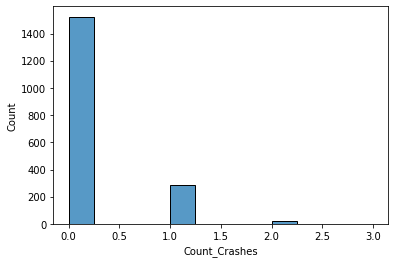

In [20]:

sns.histplot(df['Count_Crashes']);

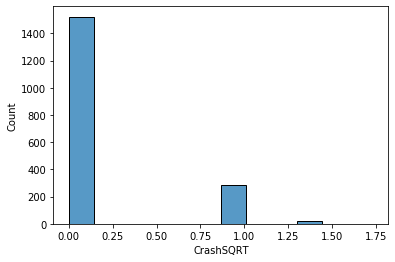

In [21]:
df['CrashSQRT'] =df['Count_Crashes']**(1/2)
sns.histplot(df['CrashSQRT']);

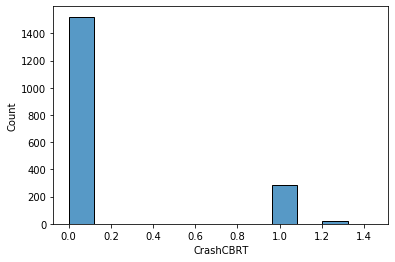

In [22]:
df['CrashCBRT'] =df['Count_Crashes']**(1/3)
sns.histplot(df['CrashCBRT']);

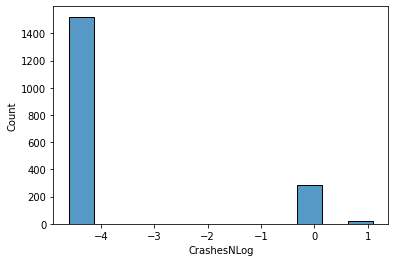

In [23]:

df['CrashesNLog'] = np.log(df['Count_Crashes']+.01)
sns.histplot(df['CrashesNLog']);

In [24]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Unnamed: 0.1        0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
topic_1             0.363410
topic_2            -0.352857
topic_3             4.464250
topic_4             3.888394
topic_5            -1.320962
topic_6            -0.565561
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
CrashSQRT           1.852040
CrashCBRT           1.809447
CrashesNLog         1.792021
dtype: float64

In [25]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,Date,Count_Crashes,Count_Fatalities,text,Low,High,windgust,windspeed,...,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
0,0,0,2016-01-01,0.0,0,,3.5,19.8,40.3,9.1,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,0.141443,0.0,0.0,-4.60517
1,1,1,2016-01-02,0.0,0,,4.6,23.5,33.3,7.7,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,0.142248,0.0,0.0,-4.60517
2,2,2,2016-01-03,0.0,0,,19.1,26.2,34.4,5.8,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,0.148368,0.0,0.0,-4.60517
3,3,3,2016-01-04,1.0,1,,18.2,30.0,28.9,7.9,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,0.154083,1.0,1.0,0.00995
4,4,4,2016-01-05,0.0,0,,27.3,38.4,0.0,14.1,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.630957,0.165563,0.0,0.0,-4.60517
5,5,5,2016-01-06,0.0,0,,29.7,38.6,46.1,7.5,...,0.166667,0.166667,0.166667,0.166667,100.000000,0.776800,0.188324,0.0,0.0,-4.60517
6,6,6,2016-01-07,0.0,0,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,31.0,33.9,0.0,4.9,...,0.194897,0.381688,0.000000,0.000000,0.729927,0.704226,0.170068,0.0,0.0,-4.60517
7,7,7,2016-01-07,0.0,0,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,31.0,33.9,0.0,4.9,...,0.291497,0.692563,0.000000,0.000000,0.729927,0.704226,0.170068,0.0,0.0,-4.60517
8,8,8,2016-01-08,0.0,0,,30.7,35.0,0.0,10.8,...,0.166667,0.166667,0.166667,0.166667,1.694915,0.808943,0.154799,0.0,0.0,-4.60517
9,9,9,2016-01-09,0.0,0,,29.6,34.9,0.0,8.3,...,0.166667,0.166667,0.166667,0.166667,0.348432,0.000000,0.131406,0.0,0.0,-4.60517


In [26]:
 df.corr()

,Unnamed: 0,Unnamed: 0.1,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,topic_1,...,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
Unnamed: 0,1.000000,1.000000,0.010769,0.010071,-0.003690,0.008537,-0.047560,-0.073456,-0.184307,0.030863,...,-0.096189,0.032703,0.041333,0.005391,0.009661,-0.069210,0.042683,0.003845,0.001941,0.000543
Unnamed: 0.1,1.000000,1.000000,0.010769,0.010071,-0.003690,0.008537,-0.047560,-0.073456,-0.184307,0.030863,...,-0.096189,0.032703,0.041333,0.005391,0.009661,-0.069210,0.042683,0.003845,0.001941,0.000543
Count_Crashes,0.010769,0.010769,1.000000,0.978138,0.050893,0.064582,-0.009549,-0.003702,-0.043735,0.052649,...,-0.005117,-0.037627,0.017477,0.021871,0.028610,-0.057082,0.035006,0.988222,0.980777,0.974165
Count_Fatalities,0.010071,0.010071,0.978138,1.000000,0.049730,0.061686,-0.006380,0.002746,-0.036987,0.075955,...,-0.010511,-0.036065,0.012448,0.017236,0.024474,-0.053848,0.029831,0.968221,0.961374,0.955223
Low,-0.003690,-0.003690,0.050893,0.049730,1.000000,0.957637,0.381878,0.267521,-0.280782,0.156698,...,0.111231,-0.249818,0.049457,0.004200,0.438265,-0.188899,0.650331,0.048245,0.047281,0.046516
High,0.008537,0.008537,0.064582,0.061686,0.957637,1.000000,0.365823,0.222397,-0.427306,0.154070,...,0.132794,-0.281913,0.062988,0.015619,0.480581,-0.279045,0.690554,0.059977,0.058430,0.057225
windgust,-0.047560,-0.047560,-0.009549,-0.006380,0.381878,0.365823,1.000000,0.679555,0.057852,-0.055057,...,0.227688,-0.056559,-0.159802,-0.133858,0.083159,0.148923,0.221960,-0.008092,-0.007604,-0.007235
windspeed,-0.073456,-0.073456,-0.003702,0.002746,0.267521,0.222397,0.679555,1.000000,0.278871,-0.162898,...,0.283849,0.037078,-0.245672,-0.216753,-0.063069,0.259883,0.079585,-0.004518,-0.004796,-0.004999
cloudcover,-0.184307,-0.184307,-0.043735,-0.036987,-0.280782,-0.427306,0.057852,0.278871,1.000000,-0.156288,...,0.029890,0.227646,-0.214983,-0.121364,-0.380841,0.487375,-0.398116,-0.033860,-0.031007,-0.028879
topic_1,0.030863,0.030863,0.052649,0.075955,0.156698,0.154070,-0.055057,-0.162898,-0.156288,1.000000,...,-0.291415,-0.532900,0.429701,0.407217,0.297369,-0.147329,0.228810,0.054968,0.055398,0.055650


In [27]:
#import seaborn as sns
#sns.pairplot(df);

In [28]:
#df['windgust'] = df['windgust'].fillna(0)

In [29]:
# df_dummies=df.copy()

# for col in df:
#   if not pd.api.types.is_numeric_dtype(df[col]):
#     df_dummies=pd.get_dummies(df_dummies, columns=[col], drop_first=True)

# df_dummies.head()


In [58]:
df.to_csv('test.csv')

In [31]:
df.skew()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Unnamed: 0.1        0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
topic_1             0.363410
topic_2            -0.352857
topic_3             4.464250
topic_4             3.888394
topic_5            -1.320962
topic_6            -0.565561
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
CrashSQRT           1.852040
CrashCBRT           1.809447
CrashesNLog         1.792021
dtype: float64

In [32]:
y = df.Count_Crashes # Label
X = df.drop(columns=['Count_Crashes']) # Features
X = df.drop(columns=['CrashesNLog'])
X = X.select_dtypes(np.number)
X.head()

,Unnamed: 0,Unnamed: 0.1,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT
0,0,0,0.0,0,3.5,19.8,40.3,9.1,0.009,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.141443,0.0,0.0
1,1,1,0.0,0,4.6,23.5,33.3,7.7,0.623,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.142248,0.0,0.0
2,2,2,0.0,0,19.1,26.2,34.4,5.8,0.834,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.148368,0.0,0.0
3,3,3,1.0,1,18.2,30.0,28.9,7.9,0.823,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.154083,1.0,1.0
4,4,4,0.0,0,27.3,38.4,0.0,14.1,0.930,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.630957,0.165563,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.head()

,Unnamed: 0,Unnamed: 0.1,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT
636,636,636,1.0,1,45.9,68.8,30.0,13.8,0.196,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,100.000000,1.0,1.0
1201,1201,1201,0.0,0,43.9,61.8,20.8,14.9,0.712,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,100.000000,0.0,0.0
401,401,401,0.0,0,41.5,53.8,26.4,15.7,0.577,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,3.225806,0.630957,0.220264,0.0,0.0
154,154,154,0.0,0,61.8,87.8,26.2,15.7,0.496,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.000000,0.630957,100.000000,0.0,0.0
1340,1340,1340,1.0,1,68.4,94.7,19.7,11.1,0.146,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.000000,0.000000,100.000000,1.0,1.0


In [50]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [51]:
clf = DecisionTreeRegressor()

In [52]:
clf = clf.fit(X_train,y_train)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
y = df['Count_Crashes']

In [83]:
X = df.drop(columns=['Count_Crashes','Count_Fatalities','CrashSQRT','CrashCBRT','Date','text','conditions','description'])

X

,Unnamed: 0,Unnamed: 0.1,Low,High,windgust,windspeed,cloudcover,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashesNLog
0,0,0,3.5,19.8,40.3,9.1,0.009,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.141443,-4.60517
1,1,1,4.6,23.5,33.3,7.7,0.623,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.142248,-4.60517
2,2,2,19.1,26.2,34.4,5.8,0.834,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.148368,-4.60517
3,3,3,18.2,30.0,28.9,7.9,0.823,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,0.154083,0.00995
4,4,4,27.3,38.4,0.0,14.1,0.930,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.630957,0.165563,-4.60517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1824,1824,23.1,37.9,0.0,9.3,0.684,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,-4.60517
1825,1825,1825,21.9,34.8,39.7,13.1,0.845,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,-4.60517
1826,1826,1826,18.0,32.0,34.4,7.9,0.322,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,-4.60517
1827,1827,1827,19.0,32.9,0.0,13.7,0.592,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,0.00995


In [84]:
X['const'] = 1 ## allows you to get the y intercept , quirk of the stats package 

In [85]:
np.asarray(df)

array([[0, 0, '2016-01-01', ..., 0.0, 0.0, -4.605170185988091],
       [1, 1, '2016-01-02', ..., 0.0, 0.0, -4.605170185988091],
       [2, 2, '2016-01-03', ..., 0.0, 0.0, -4.605170185988091],
       ...,
       [1826, 1826, '2020-12-29', ..., 0.0, 0.0, -4.605170185988091],
       [1827, 1827, '2020-12-30', ..., 1.0, 1.0, 0.009950330853168092],
       [1828, 1828, '2020-12-31', ..., 1.0, 1.0, 0.009950330853168092]],
      dtype=object)

In [86]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Count_Crashes   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2128.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:22:04   Log-Likelihood:                 1742.6
No. Observations:                1829   AIC:                            -3451.
Df Residuals:                    1812   BIC:                            -3357.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Unnamed: 0       3.367e-06   2.14e-06     

In [87]:

X.drop(columns=['const'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train.head()

,Unnamed: 0,Unnamed: 0.1,Low,High,windgust,windspeed,cloudcover,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,snowRecip,PrecipitationRT,snowdepthRecip,CrashesNLog
1162,1162,1162,43.8,50.9,34.5,26.1,0.610,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.827197,7.142857,-4.60517
1213,1213,1213,56.9,73.5,35.8,18.2,0.603,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.676243,100.000000,-4.60517
1321,1321,1321,62.6,84.4,20.8,11.2,0.083,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,-4.60517
1245,1245,1245,48.7,62.5,18.3,9.5,0.579,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.925286,100.000000,-4.60517
138,138,138,54.9,68.9,34.0,16.0,0.713,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,100.0,0.000000,100.000000,-4.60517


In [90]:
dtr = DecisionTreeRegressor(random_state=12345).fit(X_train,y_train)

In [91]:
dtr.score(X_test, y_test)

0.9900297835246259

In [92]:
df_predict = pd.DataFrame({'Actual':y_test, 'Predicted':dtr.predict(X_test)})
df_predict.head()

,Actual,Predicted
1011,0.0,0.0
588,0.0,0.0
970,0.0,0.0
101,0.0,0.0
935,0.0,0.0


In [93]:
np.exp(df_predict)

,Actual,Predicted
1011,1.0,1.0
588,1.0,1.0
970,1.0,1.0
101,1.0,1.0
935,1.0,1.0
...,...,...
1141,1.0,1.0
1647,1.0,1.0
1408,1.0,1.0
239,1.0,1.0


In [94]:
 #to publish model
joblib.dump(dtr, 'trained_moedl.sav') 

['trained_moedl.sav']